In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [30]:
root_path='/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images'

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense, Flatten,Dropout

In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline

In [ ]:
#import tensorflow as tf
#tf.test.gpu_device_name()

''

In [33]:
#Initialising the CNN
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2)))
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=4, activation='softmax'))

classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#classifier=Sequential()
#classifier.add(Conv2D(16,(3,3),input_shape=(128,128,3),activation='relu'))
#classifier.add(MaxPooling2D(pool_size= (2,2))) #1st layer

#classifier.add(Conv2D(32,(3,3),activation='relu'))
#classifier.add(MaxPooling2D(pool_size= (2,2)))#2nd layer

In [ ]:
#classifier.add(Conv2D(64,(3,3),activation='relu'))
#classifier.add(MaxPooling2D(pool_size= (2,2))) #3nd layer

In [ ]:
#classifier.add(Conv2D(128,(3,3),activation='relu'))
#classifier.add(MaxPooling2D(pool_size= (2,2))) #4nd layer

In [ ]:
#classifier.add(Flatten()),

#classifier.add(Dropout(0.5))
#classifier.add(Dense(units=128, activation='relu'))
#classifier.add(Dense(units=4, activation='softmax'))

In [ ]:
#classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [35]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train_50',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='categorical')
testing_set=test_datagen.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test_50',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='categorical')

Found 240 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [8]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [36]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [ ]:
#after how meny ipocs our
#erl_stop=EarlyStopping(monitor='val_loss',patience=6,restore_best_weights=True)
#mod_chk=ModelCheckpoint(filepath="content/drive/MyDrive/achrive/my_model.hdf5",monitor="val_loss",save_best_only=True)
#lr_rate=ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.1)


In [37]:
hist=classifier.fit_generator(training_set,shuffle=True,epochs=80,validation_data=training_set,verbose=2)
                             #callbacks=[erl_stop,mod_chk,lr_rate],shuffle=True,verbose=2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/80
8/8 - 17s - loss: 1.4955 - accuracy: 0.2208 - val_loss: 1.3821 - val_accuracy: 0.2750 - 17s/epoch - 2s/step
Epoch 2/80
8/8 - 15s - loss: 1.3835 - accuracy: 0.2625 - val_loss: 1.3757 - val_accuracy: 0.3167 - 15s/epoch - 2s/step
Epoch 3/80
8/8 - 15s - loss: 1.3685 - accuracy: 0.3250 - val_loss: 1.3467 - val_accuracy: 0.4458 - 15s/epoch - 2s/step
Epoch 4/80
8/8 - 16s - loss: 1.3371 - accuracy: 0.3583 - val_loss: 1.2910 - val_accuracy: 0.3750 - 16s/epoch - 2s/step
Epoch 5/80
8/8 - 15s - loss: 1.2659 - accuracy: 0.4250 - val_loss: 1.2230 - val_accuracy: 0.4792 - 15s/epoch - 2s/step
Epoch 6/80
8/8 - 16s - loss: 1.2223 - accuracy: 0.4333 - val_loss: 1.1698 - val_accuracy: 0.4750 - 16s/epoch - 2s/step
Epoch 7/80
8/8 - 16s - loss: 1.1941 - accuracy: 0.4708 - val_loss: 1.1306 - val_accuracy: 0.5083 - 16s/epoch - 2s/step
Epoch 8/80
8/8 - 16s - loss: 1.1328 - accuracy: 0.5208 - val_loss: 1.0837 - val_accuracy: 0.5042 - 16s/epoch - 2s/step
Epoch 9/80
8/8 - 16s - loss: 1.0627 - accuracy: 

In [ ]:
#Epoch 20/20
#5/5 - 12s - loss: 1.0009 - accuracy: 0.5250 - val_loss: 0.9919 - val_accuracy: 0.5750 - lr: 0.0010 - 12s/epoch - 2s/step
#Epoch 25/25
#5/5 - 12s - loss: 0.4795 - accuracy: 0.8062 - val_loss: 0.4670 - val_accuracy: 0.8062 - lr: 1.0000e-04 - 12s/epoch - 2s/step

In [ ]:
#20th jan
#Epoch 10/10
#5/5 [==============================] - 9s 2s/step - loss: 1.1107 - accuracy: 0.4500 - val_loss: 1.0767 - val_accuracy: 0.4812
#Epoch 15/15
#5/5 [==============================] - 9s 2s/step - loss: 0.6773 - accuracy: 0.7250 - val_loss: 0.7577 - val_accuracy: 0.6750
#Epoch 20/20
#5/5 [==============================] - 9s 2s/step - loss: 0.4416 - accuracy: 0.8313 - val_loss: 0.4524 - val_accuracy: 0.8375
#Epoch 25/25
#5/5 [==============================] - 9s 2s/step - loss: 0.2281 - accuracy: 0.9250 - val_loss: 0.1974 - val_accuracy: 0.9125
#Epoch 30/30
#5/5 [==============================] - 9s 2s/step - loss: 0.1027 - accuracy: 0.9688 - val_loss: 0.1250 - val_accuracy: 0.9688
#Epoch 35/35
#5/5 [==============================] - 9s 2s/step - loss: 0.0562 - accuracy: 0.9937 - val_loss: 0.0424 - val_accuracy: 0.9
#Epoch 40/40
#5/5 [==============================] - 9s 2s/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 0.9937
#Epoch 35/35
#5/5 [==============================] - 9s 2s/step - loss: 0.0758 - accuracy: 0.9688 - val_loss: 0.1011 - val_accuracy: 0.9750
#Epoch 50/50
#5/5 [==============================] - 10s 2s/step - loss: 0.0711 - accuracy: 0.9812 - val_loss: 0.0954 - val_accuracy: 0.9750


In [ ]:
Epoch 23/35
5/5 - 12s - loss: 0.2585 - accuracy: 0.8938 - val_loss: 0.2334 - val_accuracy: 0.9125 - lr: 1.0000e-05 - 12s/epoch - 2s/step

Text(0, 0.5, 'Train and test loss epochs')

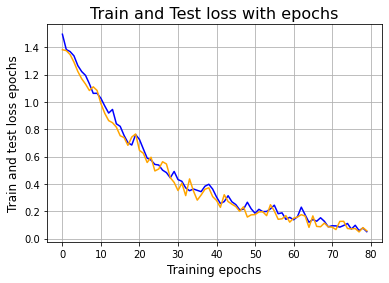

In [38]:
#ploting trsults with accuracy
plt.plot(hist.history['loss'],color='blue',label='train')
plt.plot(hist.history['val_loss'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test loss with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test loss epochs',fontsize=12)


Text(0, 0.5, 'Train and test accuracy')

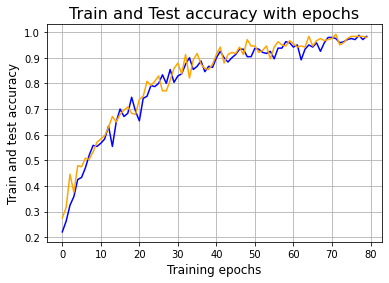

In [39]:
#ploting trsults with accuracy
plt.plot(hist.history['accuracy'],color='blue',label='train')
plt.plot(hist.history['val_accuracy'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test accuracy with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test accuracy',fontsize=12)


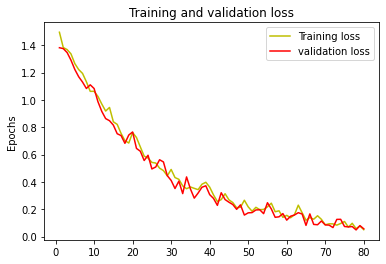

In [40]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
#plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('Training and validation loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()




In [41]:
acc=classifier.evaluate(testing_set,steps=len(testing_set),verbose=2)
print('%.2f'%(acc[1]*100))
#3/3 - 3s - loss: 2.6183 - accuracy: 0.4375 - 3s/epoch - 908ms/step
#43.75

3/3 - 3s - loss: 4.0242 - accuracy: 0.4500 - 3s/epoch - 925ms/step
45.00


In [ ]:
#3/3 - 3s - loss: 2.0982 - accuracy: 0.4375 - 3s/epoch - 838ms/step
43.75
#3/3 - 2s - loss: 1.8084 - accuracy: 0.4250 - 2s/epoch - 831ms/step
42.50=30 epochs
#sir+ with shuffle,verbose=2,epoch=40,3/3 - 3s - loss: 2.1033 - accuracy: 0.5125 - 3s/epoch - 835ms/step
#51.25pd.DataFrame(history.history).plot()
#3/3 - 2s - loss: 3.0471 - accuracy: 0.4750 - 2s/epoch - 830ms/step
#47.50,epoch=50
#ep=60,3/3 - 3s - loss: 3.4732 - accuracy: 0.3375 - 3s/epoch - 836ms/step
#33.75

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving t1.png to t1.png


In [ ]:
#for epochs 60-loss: 3.9123 - accuracy: 0.4250
#for 70 -loss-loss: 5.6648 - accuracy: 0.4250 - 3s/epoch - 895ms/step
#3/3 - 3s - loss: 2.5188 - accuracy: 0.3375 - 3s/epoch - 901ms/step
33.75
# for=30,3/3 - 3s - loss: 1.7593 - accuracy: 0.4000 - 3s/epoch - 916ms/step
40.00